In [23]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split # import the train_test_learn module
from sklearn.linear_model import LogisticRegression # import the LogisticRegression module from SKLearn

---

In [24]:
### Data loading, preparation, and EDA

In [25]:
# Load and Explore the Dataset
lending_data = pd.read_csv("Resources/lending_data.csv")
print(lending_data.head())
print(lending_data.info())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 

In [26]:
# Prepare data

# Separate the y variable, the labels
y = lending_data["loan_status"].values.reshape(-1, 1)

# Separate the X variable, the features
X = lending_data.copy()
X.drop("loan_status", axis=1, inplace=True)

In [27]:
# Review the y variable Series
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [28]:
# Review the X variable DataFrame
X.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [29]:
# Split the data using train_test_split, set random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

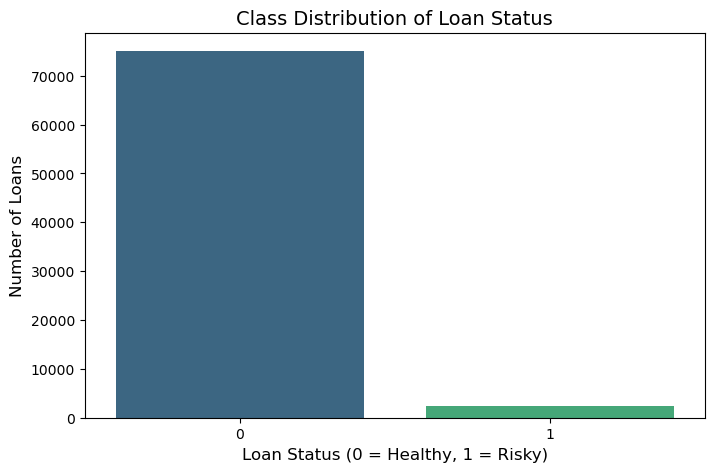

In [30]:
# EDA: Class Distribution of Labels with Explanation
def plot_class_distribution(y):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y.flatten(), palette="viridis")
    plt.title("Class Distribution of Loan Status", fontsize=14)
    plt.xlabel("Loan Status (0 = Healthy, 1 = Risky)", fontsize=12)
    plt.ylabel("Number of Loans", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    # Save the plot
    plt.savefig("Visualization/class_distribution.png", dpi=300, bbox_inches="tight")
    plt.show() # Display the plot

# Call the function (ensure 'y' is correctly defined)
plot_class_distribution(y)

c:\Users\mssab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


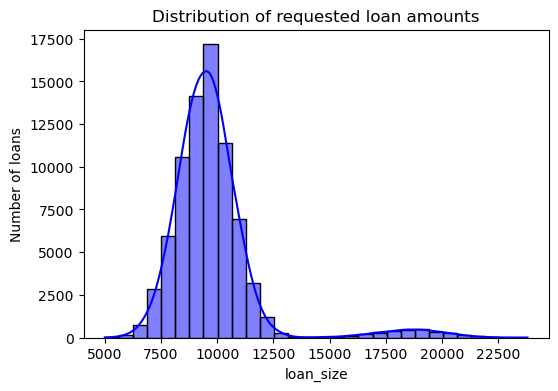

In [31]:
# EDA: Display Loan Size Distribution 
def plot_feature_distribution(X, feature_name):
    if feature_name in X.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(X[feature_name], kde=True, bins=30, color="blue")
        plt.title("Distribution of requested loan amounts")
        plt.xlabel(feature_name)
        plt.ylabel("Number of loans")
        # Save the plot
        plt.savefig("Visualization/amount_distribution.png", dpi=300, bbox_inches="tight")
        plt.show()
    else:
        print(f"Feature '{feature_name}' not found in the dataset.")
# Call the function 
plot_feature_distribution(X, 'loan_size')

---

### Logistic Regression Model

In [32]:
# Instantiate the Logistic Regression model
reg_model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
reg_model.fit(X_train, y_train)

c:\Users\mssab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [33]:
# Evaluate the Model
print(f"Training Data Score is equal to {reg_model.score(X_train, y_train):.4f}")
print(f"Testing Data Score is equal to {reg_model.score(X_test, y_test):.4f}")

Training Data Score is equal to 0.9915
Testing Data Score is equal to 0.9924


### Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [34]:
# Make a prediction using the testing data
predictions = reg_model.predict(X_test)

# Flatten y_test to be 1-dimensional for debugging purposes
y_test_flattened = y_test.ravel()

# Create the DataFrame with predictions and actual values
pd.DataFrame({"Prediction": predictions, "Actual": y_test_flattened}).head(7)

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0


### Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [35]:
# Generate Confusion Matrix
c_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", c_matrix)

Confusion Matrix:
 [[18679    80]
 [   67   558]]


In [36]:
# Create the training and testing classification reports
target_results = ['Class 0', 'Class 1']

# Print the classification report for the model
print(classification_report(y_test, predictions, target_names=target_results))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     18759
     Class 1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



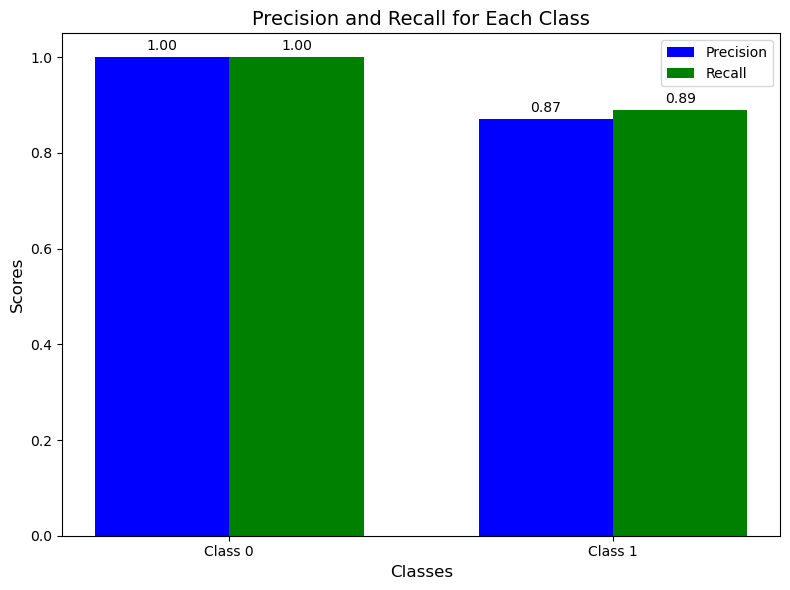

In [37]:
# Data from the classification report
classes = ['Class 0', 'Class 1']
precision = [1.00, 0.87]
recall = [1.00, 0.89]

# Create the bar graph
x = np.arange(len(classes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, precision, width, label='Precision', color='blue')
bar2 = ax.bar(x + width/2, recall, width, label='Recall', color='green')

# Add labels, title, and legend
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Precision and Recall for Each Class', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=10)
ax.legend()

# Add value labels to bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# Save the plot
plt.savefig("Visualization/precision_recall.png", dpi=300, bbox_inches="tight")
plt.show()

### Step 4: Conclusion:


##### The logistic regression model achieves 99% overall accuracy and perfectly predicts healthy loans with precision and recall of 1.00. 
#### However, its performance for high-risk loans is lower, with 87% precision and 89% recall, indicating a bias toward healthy loans due to class imbalance. Addressing this imbalance through techniques like oversampling risky loans, adjusting class weights, or prioritizing precision and recall for high-risk loans can improve the model's ability to manage credit risk effectively.

---